In [27]:
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
import lazypredict

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [28]:
df = pd.read_csv('../dataset/diamond_pricing.csv')
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Paleonium  1000 non-null   int64  
 1   Pressure   1000 non-null   int64  
 2   Price      1000 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089


In [29]:
X = df[['Paleonium','Pressure']]
scaler = StandardScaler()
x = scaler.fit_transform(X)
y = df['Price']

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=.2)

In [31]:
m1 = LinearRegression()
m1.fit(xtrain,ytrain)
m1.score(xtest,ytest) * 100

2.1092970606472528

In [32]:
m2 = DecisionTreeRegressor()
m2.fit(xtrain,ytrain)
m2.score(xtest,ytest) * 100

96.10602667718744

In [33]:
m3 = KNeighborsRegressor()
m3.fit(xtrain,ytrain)
m3.score(xtest,ytest) * 100

97.71108769130153

In [34]:
m4 = RandomForestRegressor()
m4.fit(xtrain,ytrain)
m4.score(xtest,ytest) * 100

98.19624105633298

In [35]:
m4 = SVR()
m4.fit(xtrain,ytrain)
m4.score(xtest,ytest) * 100

10.525772034239422

cross validation
 - gives us average accuracy of the model. so that we can confirm the model works in all situations

In [36]:
data = []

In [37]:
scores = cross_val_score(LinearRegression(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'linear',
    'score':scores.mean()
})

6.944516875273066 and [0.10185676 0.02858498 0.10733973 0.0180146  0.09142978]


In [38]:
scores = cross_val_score(DecisionTreeRegressor(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'decision tree',
    'score':scores.mean()
})

96.28620338266707 and [0.96565075 0.96137867 0.97373843 0.96055318 0.95298913]


In [39]:
scores = cross_val_score(KNeighborsRegressor(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'KNeigbors',
    'score':scores.mean()
})

97.43871027528975 and [0.96693893 0.97410387 0.9757381  0.98212806 0.97302657]


In [40]:
scores = cross_val_score(RandomForestRegressor(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'random forest',
    'score':scores.mean()
})

98.3031011736272 and [0.98548193 0.97830956 0.98701139 0.98266303 0.98168915]


In [41]:
scores = cross_val_score(SVR(), x, y, cv=5)
print(f'{scores.mean() * 100} and {scores}')
data.append({
    'algo':'svr',
    'score':scores.mean()
})

8.712430813223932 and [0.06011963 0.10565255 0.10054044 0.06589522 0.1034137 ]


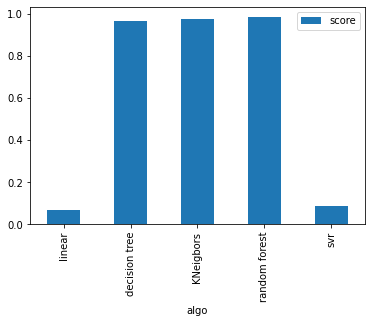

In [42]:
report = pd.DataFrame(data)
report.set_index('algo',inplace=True)
report.plot(kind='bar')
plt.show()

Grid search
 - it help us to find which property and what values are best for a model to improve accuracy

In [43]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the fore

In [44]:
params = {
    'n_estimators':[10,50,100,150,200,250,500],
    'criterion':['mse','mae'],
    'max_depth':[5,10,15,20,50],
    'max_features':['auto','sqrt','log2']
}
model = RandomForestRegressor()
grid = GridSearchCV(model, params, cv=3, n_jobs=-1, verbose=True)

In [45]:
grid

GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 500]},
             verbose=True)

In [46]:
grid.fit(x,y)

Fitting 3 folds for each of 210 candidates, totalling 630 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 630 out of 630 | elapsed:  3.8min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [5, 10, 15, 20, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100, 150, 200, 250, 500]},
             verbose=True)

In [47]:
griddf  = pd.DataFrame(grid.cv_results_)
griddf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034232,0.008706,0.005041,0.000542,mse,5,auto,10,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.926307,0.902801,0.907593,0.912234,0.010142,183
1,0.169177,0.025937,0.012920,0.001753,mse,5,auto,50,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.931514,0.908381,0.913414,0.917770,0.009934,180
2,0.287836,0.012471,0.014594,0.001771,mse,5,auto,100,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.934756,0.910156,0.913183,0.919365,0.010953,177
3,0.419171,0.059661,0.022532,0.002562,mse,5,auto,150,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.936206,0.912341,0.914441,0.920996,0.010789,169
4,0.703750,0.028493,0.035269,0.005425,mse,5,auto,200,"{'criterion': 'mse', 'max_depth': 5, 'max_feat...",0.933995,0.912019,0.912248,0.919421,0.010306,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,1.176927,0.151701,0.026458,0.003609,mae,50,log2,100,"{'criterion': 'mae', 'max_depth': 50, 'max_fea...",0.980472,0.977151,0.979307,0.978977,0.001376,96
206,1.673376,0.137288,0.034710,0.003284,mae,50,log2,150,"{'criterion': 'mae', 'max_depth': 50, 'max_fea...",0.982366,0.979008,0.980162,0.980512,0.001393,33
207,2.362268,0.264305,0.057351,0.008488,mae,50,log2,200,"{'criterion': 'mae', 'max_depth': 50, 'max_fea...",0.981981,0.979192,0.980086,0.980419,0.001163,38
208,2.870546,0.272022,0.064714,0.003497,mae,50,log2,250,"{'criterion': 'mae', 'max_depth': 50, 'max_fea...",0.982647,0.977896,0.980171,0.980238,0.001940,43


In [48]:
griddf.sort_values(by='rank_test_score',inplace=True)

In [49]:
griddf.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
173,4.35084,0.246794,0.058178,0.002421,mae,20,auto,250,"{'criterion': 'mae', 'max_depth': 20, 'max_fea...",0.981512,0.98225,0.982038,0.981933,0.00031,1


In [50]:
grid.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=20, n_estimators=250)

In [51]:
model = grid.best_estimator_

In [52]:
df['prediction'] = model.predict(x)

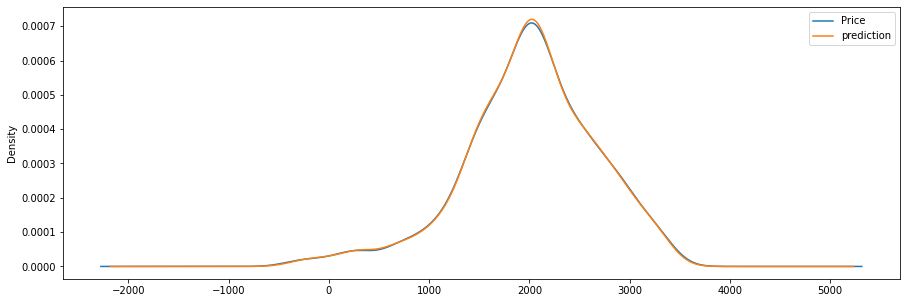

In [53]:
ax=df['Price'].plot(kind='kde',figsize=(15,5))
df['prediction'].plot(kind='kde',figsize=(15,5), ax = ax)
plt.legend()
plt.show()